<h1>Lab 02 - Background</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

One way to check the relationship between two variables is to calculate the covariance. We can take variables x and y and plug them into this equation

Covariance(x,y) = sum((x - mean(x)) * (y - mean(y)) * 1/(n-1)) or the numpy method cov()

If the returned value is zero, it would indidcate that both variables are independant of eachother. 

<h3>Genertaing 2D Flat Distribution</h3>

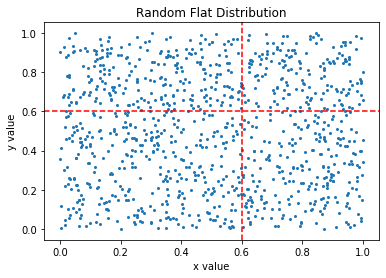

In [2]:
#Generating random data
def createData(num):
    x = np.random.random(num)
    y = np.random.random(num)
    return x,y

#Creating the Scatter plot with axis
xInt = 0.6
yInt = 0.6
test = createData(num = 1000)
plt.scatter(test[0],test[1],s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')

In [3]:
#Counts how many plots are in the A region
def countPoints(x,y,xInt,yInt):
    count = 0
    for i in range(0, len(x)):
        if x[i] > yInt:
            if y[i] > xInt:
                count += 1
    return count    

print(countPoints(test[0], test[1],xInt,yInt))

165


Expected points located in region A should be 0.4 x 0.4 = 0.16 or 16% of the data points since this is a flat distribution. So we should expect to see 160 points in the region. The actual amount of plot located in region A is 165 on my run.

<h3>Creating a Data Set for Points in Region A</h3>

Text(0.5, 1.0, 'Distribution of Total Events in Region A')

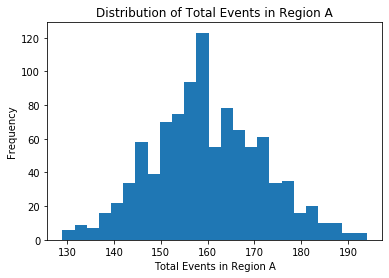

In [4]:
#Creating a Data Set
scatterDataSet = []
for i in range(1000):
    temp = createData(num = 1000)
    scatterDataSet.append(countPoints(temp[0], temp[1],xInt,yInt))

plt.hist(scatterDataSet, bins = 25)
plt.xlabel('Total Events in Region A')
plt.ylabel('Frequency')
plt.title('Distribution of Total Events in Region A')

This appears to be a Gaussian distribution because since the distribution is suppose to be a flat distribution, we can accurately predict the expected value of points lying in a specific region. Since this is a consistant test, we should expect the count to land near the expected values. 

<h3>Vary Size of the Statistics</h3>

Coefficents are  0.1604272284006674 and -5.008240538350719
Mean Squared Error is 264537929.0
R^2 value is 0.9999894289946069
[3, 20, 78, 154, 777, 1601, 8018]


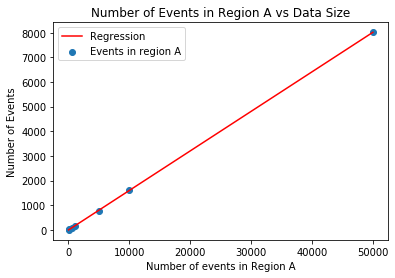

In [5]:
#Creates the Data for varying sizes of events
x = [10, 100, 500, 1000, 5000, 10000, 50000]
yActual = []
for count in x:
    tempX, tempY = createData(num = count)
    yActual.append(countPoints(tempX, tempY,xInt,yInt))
    

#Creating the linear regression line
reg = linear_model.LinearRegression()

mean_x = np.mean(x)
mean_y = np.mean(yActual)
n = len(x)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (x[i] - mean_x)*(yActual[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2
b1 = numerator/denominator
b0 = mean_y - (b1 * mean_x)

print('Coefficents are ', b1, 'and', b0)
print('Mean Squared Error is', mean_squared_error(x, yActual))

#Finding the R^2 value of data set
x = np.reshape(x,(n,1))
test = reg.fit(x,yActual)
yPredict = reg.predict(x)
r2 = reg.score(x,yActual)
print('R^2 value is', r2)

print(yActual)
#Plot the regression line and data points
plt.scatter(x, yActual, label = 'Events in region A')    
plt.plot(x, b0 + b1 * x, color='red', label = 'Regression')
plt.xlabel("Number of events in Region A")
plt.ylabel('Number of Events')
plt.title('Number of Events in Region A vs Data Size')
plt.legend()

I know that the prediction error is basically the distance from the data points to a point on the best fit line of our data. I would need to find the root mean squared value and the coefficents of the linear regression line in form mx + b and ft that to the scatter plot. 

<h3>Random Log Functions</h3>

Events in region A = 1


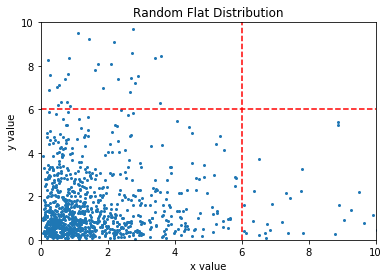

In [6]:
#Makes random log events 
x = np.random.lognormal(mean = 0.1, size = 1000)
y = np.random.lognormal(mean = 0.1, size = 1000)
xInt = 6
yInt = 6

#Plots the data
plt.scatter(x,y,s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.xlim(0,10)
plt.ylim(0,10)
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')
print('Events in region A =', countPoints(x,y,xInt,yInt))

I compared two log functions against eachother expecting to the least amount of points in region A. As expected, this was comfirmed where log functions output greater values at lower value numbers and numbers closer to 0 as the input increases.

<h3>Random Gaussian Distribution</h3>

Total events in region A = 246


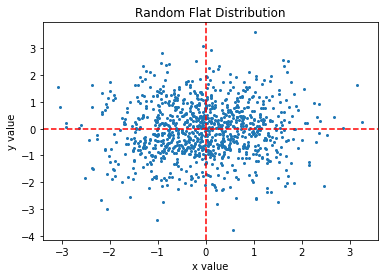

In [7]:
#Makes random gaussian events
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
xInt = 0
yInt = 0

#Plots the scatter plot
plt.scatter(x,y,s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')
print('Total events in region A =', countPoints(x,y,xInt,yInt))

Similarly, when comparing two gaussian distributions, we expect that the center of the data set would be the most dense area. We can see that relationship in the data since many of the events gravitate towards the average of the distribution which in this case is 0. If I were create a x and y split both at 0, I would expect an even distribution in all 4 quadrants. In this case, 25% of 1000 events is 250 events which is very close to the 256 events we obtained.

<h3>Vary Size of the Stats (Version B)</h3>

Coefficents are  0.16005473838232745 and -0.2605890924044161
Mean Squared Error is 264696683.7164491
R^2 value is 0.9999999219009571


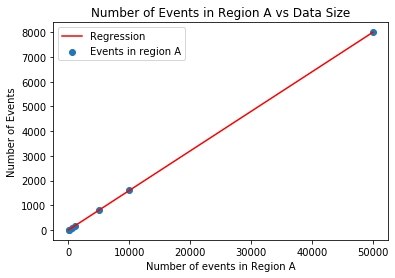

In [8]:
#I was not sure what type of graph was needed for the last part but I realized I missed the 1000 runs
# part of the problem. SO i just took the average ofthe the 1000 runs at each event and plot that against
#the other events to get a line regression of the problem.


#Creates the Data for varying sizes of events
x1 = [10, 100, 500, 1000, 5000, 10000, 50000]
yActual1 = []
for count in x1:
    y_ave = 0
    for i in range(1000):
        tempX, tempY = createData(num = count)
        y_ave += countPoints(tempX, tempY,0.6,0.6)
    yActual1.append(y_ave/1000)

#Creating the linear regression line
reg = linear_model.LinearRegression()

mean_x = np.mean(x1)
mean_y = np.mean(yActual1)
n = len(x1)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (x1[i] - mean_x)*(yActual1[i] - mean_y)
    denominator += (x1[i] - mean_x) ** 2
b1 = numerator/denominator
b0 = mean_y - (b1 * mean_x)

print('Coefficents are ', b1, 'and', b0)
print('Mean Squared Error is', mean_squared_error(x1, yActual1))

#Finding the R^2 value of data set
x1 = np.reshape(x1,(n,1))
test = reg.fit(x1,yActual1)
yPredict = reg.predict(x1)
r2 = reg.score(x1,yActual1)
print('R^2 value is', r2)

#Plot the regression line and data points
plt.scatter(x1, yActual1, label = 'Events in region A')    
plt.plot(x1, b0 + b1 * x1, color='red', label = 'Regression')
plt.xlabel("Number of events in Region A")
plt.ylabel('Number of Events')
plt.title('Number of Events in Region A vs Data Size')
plt.legend()